<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/NLP_Vanilla_RNN%EC%9C%BC%EB%A1%9C_IMDb_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

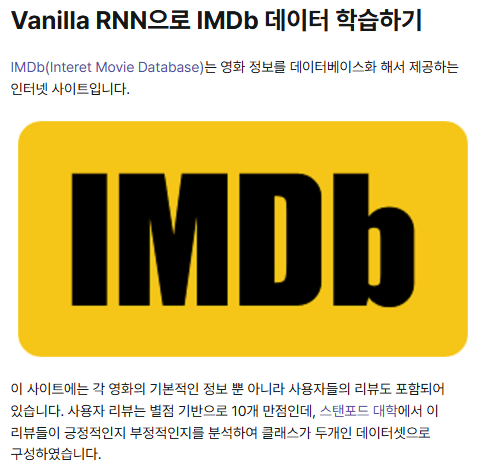

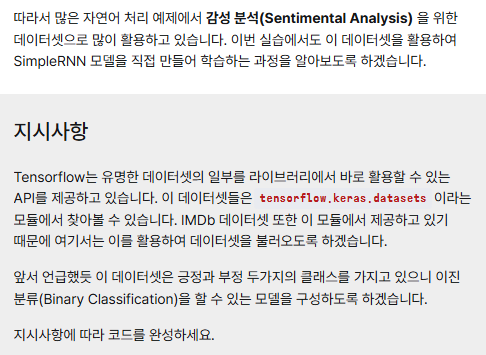

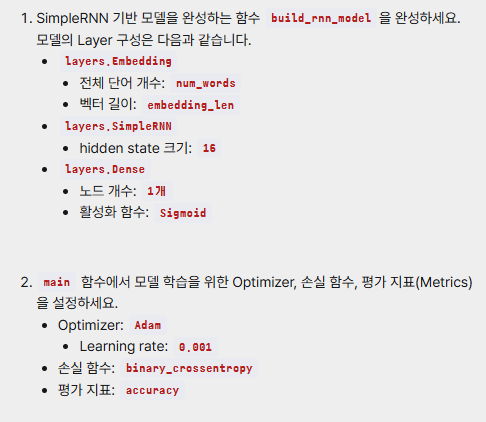

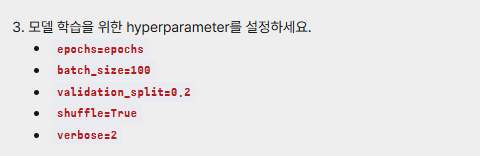

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(num_words, max_len):
    # imdb 데이터셋을 불러옵니다. 데이터셋에서 단어는 num_words 개를 가져옵니다.
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

    # 단어 개수가 다른 문장들을 Padding을 추가하여
    # 단어가 가장 많은 문장의 단어 개수로 통일합니다.
    X_train = pad_sequences(X_train, maxlen=max_len)
    X_test = pad_sequences(X_test, maxlen=max_len)

    return X_train, X_test, y_train, y_test

def build_rnn_model(num_words, embedding_len):
    model = Sequential()

    # TODO: [지시사항 1번] 지시사항에 따라 모델을 완성하세요.
    model.add(layers.Embedding(num_words, embedding_len))
    model.add(layers.SimpleRNN(16))
    model.add(layers.Dense(1, activation="sigmoid")) # 값이 1인 이유 : 값을 1개로 해서 sigmoid 확률 값으로 해석해서 긍정, 부정 값으로 뽑음

    return model

def main(model=None, epochs=5):
    # IMDb 데이터셋에서 가져올 단어의 개수
    num_words = 6000

    # 각 문장이 가질 수 있는 최대 단어 개수
    max_len = 130

    # 임베딩 된 벡터의 길이
    embedding_len = 100

    # IMDb 데이터셋을 불러옵니다.
    X_train, X_test, y_train, y_test = load_data(num_words, max_len)

    if model is None:
        model = build_rnn_model(num_words, embedding_len)

    # TODO: [지시사항 2번] 모델 학습을 위한 optimizer와 loss 함수를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

    # TODO: [지시사항 3번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=100, validation_split=0.2, shuffle=True, verbose=2)

    # 모델을 테스트 데이터셋으로 테스트합니다.
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print()
    print("테스트 Loss: {:.5f}, 테스트 정확도: {:.3f}%".format(test_loss, test_acc * 100))

    return optimizer, hist

if __name__=="__main__":
    main()


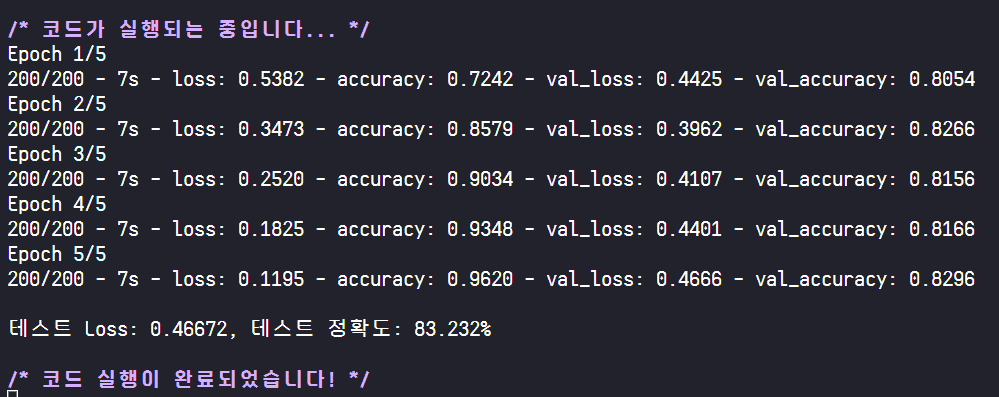